In [1]:
import numpy as np
import ast

import pandas as pd

In [2]:
df = pd.read_csv ('android_dataset.csv')

In [4]:
file1 = open("40_per_mutual.txt","r")
print("Output of Readlines after writing") 
#print(type(file1.readlines()))
a=file1.readlines()
feat=[]
for line in a:
    feat.append(line.strip('\n').replace(" ", "_"))

Output of Readlines after writing


In [5]:
feat

['SEND_SMS',
 'RECEIVE_SMS',
 'READ_SMS',
 'READ_PHONE_STATE',
 'READ_EXTERNAL_STORAGE',
 'WRITE_SMS',
 'RECEIVE_BOOT_COMPLETED',
 'RESTART_PACKAGES',
 'WAKE_LOCK',
 'ACCESS_NETWORK_STATE',
 'WRITE_EXTERNAL_STORAGE',
 'INTERNET',
 'CHANGE_WIFI_STATE',
 'SYSTEM_ALERT_WINDOW',
 'READ_CONTACTS',
 'READ_CALL_LOG',
 'WRITE_SETTINGS',
 'DISABLE_KEYGUARD',
 'WRITE_CONTACTS',
 'CAMERA',
 'WRITE_CALL_LOG',
 'CHANGE_NETWORK_STATE',
 'ACCESS_WIFI_STATE',
 'RECEIVE_MMS',
 'READ_HISTORY_BOOKMARKS',
 'EXPAND_STATUS_BAR',
 'GET_ACCOUNTS',
 'CHANGE_CONFIGURATION',
 'PROCESS_OUTGOING_CALLS',
 'CALL_PHONE',
 'WRITE_HISTORY_BOOKMARKS',
 'GET_PACKAGE_SIZE',
 'GET_TASKS',
 'ACCESS_MOCK_LOCATION',
 'PERSISTENT_ACTIVITY',
 'ACCESS_FINE_LOCATION',
 'SET_WALLPAPER_HINTS',
 'USE_CREDENTIALS']

In [6]:
#X=df.loc[:, df.columns != 'label']
X=df.loc[:,feat]
X

,SEND_SMS,RECEIVE_SMS,READ_SMS,READ_PHONE_STATE,READ_EXTERNAL_STORAGE,WRITE_SMS,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,WAKE_LOCK,ACCESS_NETWORK_STATE,...,PROCESS_OUTGOING_CALLS,CALL_PHONE,WRITE_HISTORY_BOOKMARKS,GET_PACKAGE_SIZE,GET_TASKS,ACCESS_MOCK_LOCATION,PERSISTENT_ACTIVITY,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,USE_CREDENTIALS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,1,1,1,1,0,1,1,0,1,1,...,1,1,0,0,0,0,0,1,0,1
12030,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
12031,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y=df.loc[:,'label']
Y

0        0
1        0
2        0
3        0
4        0
        ..
12029    1
12030    1
12031    1
12032    1
12033    1
Name: label, Length: 12034, dtype: int64

In [8]:
size=[0.1,0.2,0.3,0.4]
random_forest_acc=[]
random_forest_pre=[]
random_forest_recall=[]
random_forest_f1=[]
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=RandomForestClassifier(n_estimators=35)

#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy: ",s, ' ' ,metrics.accuracy_score(y_test, y_pred))
    a=max(a,metrics.accuracy_score(y_test, y_pred))
    
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    print(f1_score(y_test, y_pred, average=None))
    random_forest_acc.append(metrics.accuracy_score(y_test, y_pred))
    random_forest_pre.append(precision_score(y_test, y_pred, average="macro"))
    random_forest_recall.append(recall_score(y_test, y_pred, average="macro"))

    random_forest_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  0.296875
memory (128810, 2683735)
Accuracy:  0.1   0.936046511627907
0.9360270498732037
0.9365007016497056
0.9360201212462369
[0.93714286 0.93491124]
time  0.3125
memory (4154379, 6439387)
Accuracy:  0.2   0.9339426672206066
0.9337611567640335
0.9349424953958846
0.9332379255335326
[0.93722858 0.93029373]
time  0.25
memory (4176187, 8200644)
Accuracy:  0.3   0.9321517585156467
0.932069049318364
0.9323718799787573
0.9318868769029292
[0.93443939 0.92969871]
time  0.234375
memory (4198117, 8232187)
Accuracy:  0.4   0.9312422102201912
0.9311512272461799
0.9316765167925037
0.9309067688378033
[0.93365404 0.92864842]


In [9]:
size=[0.1,0.2,0.3,0.4]
nb_acc=[]
nb_pre=[]
nb_recall=[]
nb_f1=[]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    #X_train, X_test = select_features(X_train, y_train, X_test)
    clf=GaussianNB()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    nb_acc.append(metrics.accuracy_score(y_test, y_pred))
    nb_pre.append(precision_score(y_test, y_pred, average="macro"))
    nb_recall.append(recall_score(y_test, y_pred, average="macro"))
    nb_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.8239202657807309
0.8214364665620113
0.8310638237018605
0.8201419946178121
Accuracy: 0.8375571250519319
0.8360602423133288
0.84780348759222
0.8365905277476644
Accuracy: 0.8305178620880642
0.8285485795006684
0.8381150216235126
0.8277455946087902
Accuracy: 0.8323639385126713
0.8307297933450619
0.842199672243664
0.8310499492427852


In [10]:
size=[0.1,0.2,0.3,0.4]
k_acc=[]
k_pre=[]
k_recall=[]
k_f1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    k_acc.append(metrics.accuracy_score(y_test, y_pred))
    k_pre.append(precision_score(y_test, y_pred, average="macro"))
    k_recall.append(recall_score(y_test, y_pred, average="macro"))
    k_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9343853820598007
0.9343842504540936
0.9345742801625154
0.9344843382204819
Accuracy: 0.9214790195263813
0.9214735979758508
0.9217991848576954
0.921583675103912
Accuracy: 0.9277208529493215
0.9275714557432607
0.928698463104401
0.9271661507556939
Accuracy: 0.9293726630660574
0.9293272731543467
0.9293984738362677
0.9292718210285296


In [11]:
size=[0.1,0.2,0.3,0.4]
s_acc=[]
s_pre=[]
s_recall=[]
s_f1=[]
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import tracemalloc
import os
import psutil
 
import time

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=SVC(kernel ='rbf', random_state = 1) 
#Train the model using the training sets y_pred=clf.predict(X_test)
    tracemalloc.start()
    
    start = time.process_time()
    clf.fit(X_train,y_train)
    print('time ',time.process_time() - start)
    print('memory',tracemalloc.get_traced_memory())
 
    # stopping the library
    tracemalloc.stop()
    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    s_acc.append(metrics.accuracy_score(y_test, y_pred))
    s_pre.append(precision_score(y_test, y_pred, average="macro"))
    s_recall.append(recall_score(y_test, y_pred, average="macro"))
    s_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

time  3.453125
memory (5195683, 564365984)
Accuracy: 0.925249169435216
0.925063069841551
0.9255790511425944
0.9247321931967676
time  2.8125
memory (629233, 6001965)
Accuracy: 0.9385126713751558
0.9384358975422472
0.9390148028706081
0.9381899689855013
time  2.5625
memory (555893, 5259861)
Accuracy: 0.9343672112988092
0.9341926107626266
0.9352196186992576
0.9337029979815253
time  1.53125
memory (477098, 4518749)
Accuracy: 0.9266722060656418
0.9265880413911735
0.9272889089914624
0.926362961428226


In [12]:
size=[0.1,0.2,0.3,0.4]
d_acc=[]
d_pre=[]
d_recall=[]
d_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    clf=tree.DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    d_acc.append(metrics.accuracy_score(y_test, y_pred))
    d_pre.append(precision_score(y_test, y_pred, average="macro"))
    d_recall.append(recall_score(y_test, y_pred, average="macro"))
    d_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9310631229235881
0.9308225602685911
0.9321409236663474
0.9301905877930952
Accuracy: 0.9214790195263813
0.9213539166241531
0.9218940592839351
0.9210825059248664
Accuracy: 0.9285516477430075
0.9282830195650968
0.9292358874712374
0.9277193645874645
Accuracy: 0.9185708350643955
0.9183845337297056
0.9197845387544193
0.9179502625970868


In [13]:
size=[0.1,0.2,0.3,0.4]
lr_acc=[]
lr_pre=[]
lr_recall=[]
lr_f1=[]
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
for s in size:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 
    lr_acc.append(metrics.accuracy_score(y_test, y_pred))
    lr_pre.append(precision_score(y_test, y_pred, average="macro"))
    lr_recall.append(recall_score(y_test, y_pred, average="macro"))
    lr_f1.append( 2 * (precision_score(y_test, y_pred, average="macro") * recall_score(y_test, y_pred, average="macro")) / (precision_score(y_test, y_pred, average="macro") + recall_score(y_test, y_pred, average="macro")))

Accuracy: 0.9169435215946844
0.91678830502477
0.9167309324200685
0.9168507638072856
Accuracy: 0.9252181138346489
0.9251110733146102
0.9251970872577902
0.9250366029174495
Accuracy: 0.9221822209914151
0.9221660803565832
0.9221695189633546
0.9221627832767751
Accuracy: 0.9254258412962194
0.925402584522862
0.9254191915773538
0.9253879758268619


In [14]:

import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
#t = ['10%','20%','SVM','Naive Bayes','Decision tree']
t = ['10%','20%','30%','40%']
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1

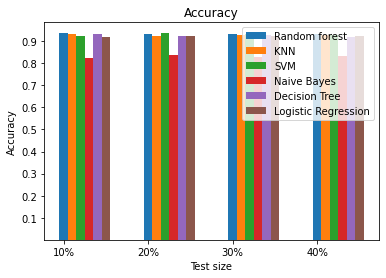

In [16]:
plt.bar(ind, random_forest_acc, width, label = 'Random forest')
plt.bar(ind+width, k_acc, width, label = 'KNN')
plt.bar(ind+width*2, s_acc, width, label = 'SVM')
plt.bar(ind+width*3, nb_acc, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_acc, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_acc, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
# Display

#plt.show()
plt.savefig('40_per_mutual/acc.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

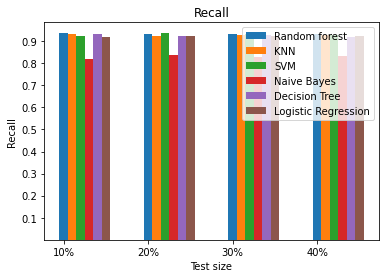

In [17]:
plt.bar(ind, random_forest_recall, width, label = 'Random forest')
plt.bar(ind+width, k_recall, width, label = 'KNN')
plt.bar(ind+width*2, s_recall, width, label = 'SVM')
plt.bar(ind+width*3, nb_recall, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_recall, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_recall, width, label = 'Logistic Regression')
# Xticks

plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall")
# Display

#plt.show()
plt.savefig('40_per_mutual/recall.png',facecolor=(1, 1, 1),dpi=200)

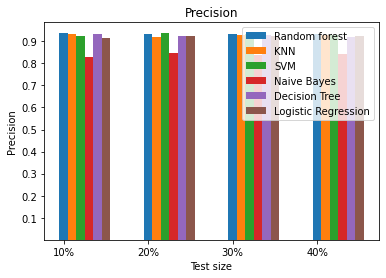

In [18]:
plt.bar(ind, random_forest_pre, width, label = 'Random forest')
plt.bar(ind+width, k_pre, width, label = 'KNN')
plt.bar(ind+width*2, s_pre, width, label = 'SVM')
plt.bar(ind+width*3, nb_pre, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_pre, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_pre, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
# Display

#plt.show()
plt.savefig('40_per_mutual/Precision.png',facecolor=(1, 1, 1),dpi=200)

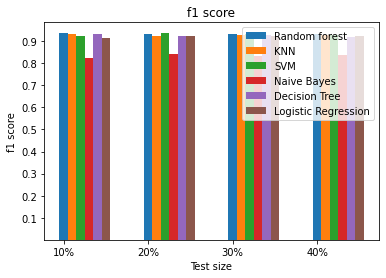

In [19]:
plt.bar(ind, random_forest_f1, width, label = 'Random forest')
plt.bar(ind+width, k_f1, width, label = 'KNN')
plt.bar(ind+width*2, s_f1, width, label = 'SVM')
plt.bar(ind+width*3, nb_f1, width, label = 'Naive Bayes')
plt.bar(ind+width*4, d_f1, width, label = 'Decision Tree')
plt.bar(ind+width*5, lr_f1, width, label = 'Logistic Regression')
# Xticks
#plt.figure()
plt.xticks(x_axis, t)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
plt.xlabel("Test size")
plt.ylabel("f1 score")
plt.legend()
plt.title("f1 score")
# Display

#plt.show()
plt.savefig('40_per_mutual/f1_score.png',facecolor=(1, 1, 1),dpi=200)

In [20]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_acc)
per_22.append(k_acc)
per_22.append(s_acc)
per_22.append(nb_acc)
per_22.append(d_acc)
per_22.append(lr_acc)
df_acc = pd.DataFrame(per_22)
df_acc=df_acc.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_acc.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_acc.to_csv('40_per_mutual/acc.csv')


In [21]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_recall)
per_22.append(k_recall)
per_22.append(s_recall)
per_22.append(nb_recall)
per_22.append(d_recall)
per_22.append(lr_recall)
df_recall = pd.DataFrame(per_22)
df_recall=df_recall.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_recall.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_recall.to_csv('40_per_mutual/recall.csv')


In [22]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_pre)
per_22.append(k_pre)
per_22.append(s_pre)
per_22.append(nb_pre)
per_22.append(d_pre)
per_22.append(lr_pre)
df_pre = pd.DataFrame(per_22)
df_pre=df_pre.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_pre.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_pre.to_csv('40_per_mutual/pre.csv')


In [23]:
per_22=[]
#per_22.append(['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
#per_22.append( ['10%','20%','30%','40%'])
per_22.append(random_forest_f1)
per_22.append(k_f1)
per_22.append(s_f1)
per_22.append(nb_f1)
per_22.append(d_f1)
per_22.append(lr_f1)
df_f1 = pd.DataFrame(per_22)
df_f1=df_f1.transpose()
#df_acc=pd.DataFrame(df_acc,columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression'])
df_f1.columns=['Random forest','KNN','SVM','Naive Bayes','Decision Tree','Logistic Regression']
df_f1.to_csv('40_per_mutual/f1.csv')
